In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups

border_fp = 'L4_data/Helsinki_borders.shp'
grid_fp = 'L4_data/TravelTimes_to_5975375_RailwayStation.shp'

hel = gpd.read_file(border_fp)
grid = gpd.read_file(grid_fp)

<AxesSubplot:>

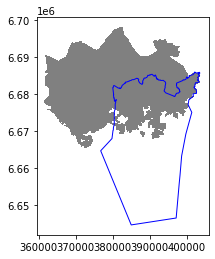

In [3]:
ax = grid.plot(facecolor='gray')
hel.plot(ax=ax, facecolor='None', edgecolor='blue')

In [4]:
hel.crs

{'init': 'epsg:3067'}

In [5]:
grid.crs

{'init': 'epsg:3067'}

In [6]:
assert hel.crs == grid.crs, "CRS differs between the layers"

<AxesSubplot:>

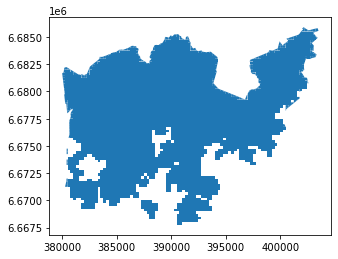

In [8]:
intersection = gpd.overlay(grid, hel, how='intersection')
intersection.plot()

In [9]:
intersection.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6..."


In [10]:
outfp = 'L4_data/Traveltimes_to_5975375_RailWayStation_Helsinky_test.geojson'
intersection.to_file(outfp, drivers='GeoJSON')

In [20]:
dissolved = intersection.dissolve(by='car_r_t')
dissolved.head()

,geometry,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE
car_r_t,,,,,,,,,,,,,,,,,,
-1,"MULTIPOLYGON (((388000.000 6668750.000, 387750...",-1,-1,-1,5913094,-1,-1,-1,-1,-1,-1,-1,-1,-1,27517366,Helsinki,Helsingfors,091
0,"POLYGON ((386000.000 6672000.000, 385750.000 6...",0,0,0,5975375,0,0,0,0,0,0,5975375,0,0,27517366,Helsinki,Helsingfors,091
7,"POLYGON ((386250.000 6671750.000, 386000.000 6...",1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6,27517366,Helsinki,Helsingfors,091
8,"MULTIPOLYGON (((386250.000 6671500.000, 386000...",1286,8,1286,5973736,706,10,10,706,10,10,5975375,706,10,27517366,Helsinki,Helsingfors,091
9,"MULTIPOLYGON (((387000.000 6671500.000, 386750...",1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18,27517366,Helsinki,Helsingfors,091


In [21]:
print(f'Rows in original intersection GeoDataFrame: {len(intersection)}')
print(f'Rows in dissolved layer: {len(dissolved)}')

Rows in original intersection GeoDataFrame: 3826
Rows in dissolved layer: 51


In [22]:
dissolved.columns
# dissolve.columns.values.tolist()

Index(['geometry', 'car_m_d', 'car_m_t', 'car_r_d', 'from_id', 'pt_m_d',
       'pt_m_t', 'pt_m_tt', 'pt_r_d', 'pt_r_t', 'pt_r_tt', 'to_id', 'walk_d',
       'walk_t', 'GML_ID', 'NAMEFIN', 'NAMESWE', 'NATCODE'],
      dtype='object')

In [23]:
dissolved.index

Int64Index([-1,  0,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
            39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            56],
           dtype='int64', name='car_r_t')

In [26]:
dissolved.loc[15]

geometry    (POLYGON ((387750.0001355155 6669250.000042822...
car_m_d                                                  7458
car_m_t                                                    13
car_r_d                                                  7458
from_id                                               5934913
pt_m_d                                                   6858
pt_m_t                                                     26
pt_m_tt                                                    30
pt_r_d                                                   6858
pt_r_t                                                     27
pt_r_tt                                                    32
to_id                                                 5975375
walk_d                                                   6757
walk_t                                                     97
GML_ID                                               27517366
NAMEFIN                                              Helsinki
NAMESWE 

In [27]:
dissolved.loc[15].head()

geometry    (POLYGON ((387750.0001355155 6669250.000042822...
car_m_d                                                  7458
car_m_t                                                    13
car_r_d                                                  7458
from_id                                               5934913
Name: 15, dtype: object

In [29]:
selection = gpd.GeoDataFrame([dissolved.loc[15]], crs=dissolved.crs)
selection

,geometry,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE
15,"MULTIPOLYGON (((387750.000 6669250.000, 387500...",7458,13,7458,5934913,6858,26,30,6858,27,32,5975375,6757,97,27517366,Helsinki,Helsingfors,091


In [30]:
selection.index

Int64Index([15], dtype='int64')

<AxesSubplot:>

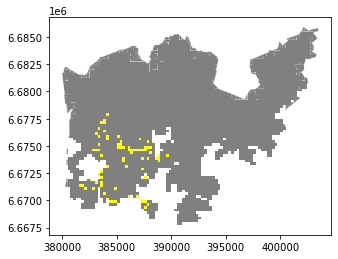

In [33]:
ax = dissolved.plot(facecolor='grey')
selection.plot(ax=ax, facecolor='yellow')